## **Load** **Dataset**

In [332]:

import pandas as pd
df = pd.read_csv('Processed_Data_V2.csv')

# **Data Preprocessing**

In [333]:
# create a dictionary of pm 2.5 values and their corresponding AQI category
aqi_dict = {0: 'Good', 51: 'Satisfactory', 101: 'Moderate', 251: 'Poor', 351: 'Very Poor', 431: 'Severe'}

# create a function to map pm 2.5 values to AQI categories
def get_aqi_bucket(value):
    for aqi_value, aqi_category in aqi_dict.items():
        if value <= aqi_value:
            return aqi_category
    return 'Beyond Index'

# create a new column named aqi_bucket based on pm_2.5 values
df['aqi_bucket'] = df['PM2.5'].apply(get_aqi_bucket)

In [334]:
df.sample(15)

,Workbook,Regions,State - Code,From Date,To Date,CO,NH3,NO2,Ozone,PM10,PM2.5,SO2,aqi_bucket
15641,2018,Vivek Vihar,Delhi - DPCC,11-07-2018 12:00,12-07-2018 12:00,1.11,34.32,28.81,13.84,130.75,43.30,12.48,Satisfactory
2608,2017,North Campus DU,Delhi - IMD,06-09-2017 12:00,07-09-2017 12:00,0.00,NaN,0.00,29.15,0.00,0.00,NaN,Good
35446,2020,Lodhi Road,Delhi - IMD,12-02-2020 12:00,13-02-2020 12:00,0.94,NaN,26.02,39.46,165.26,78.39,NaN,Moderate
4712,2018,Ashok Vihar,Delhi - DPCC,24-10-2018 12:00,25-10-2018 12:00,1.74,41.65,85.39,85.19,335.85,64.06,27.02,Moderate
8320,2018,ITO,Delhi - CPCB,15-11-2018 12:00,16-11-2018 12:00,0.78,17.10,47.24,32.61,193.58,146.17,3.55,Poor
67950,2022,Okhla Phase-2,Delhi - DPCC,21-02-2022 12:00,22-02-2022 12:00,1.60,33.45,86.19,33.24,293.91,90.40,10.09,Moderate
68737,2022,Punjabi Bagh,Delhi - DPCC,17-01-2022 12:00,18-01-2022 12:00,1.81,31.07,67.94,17.49,389.50,262.02,18.66,Very Poor
64096,2022,Lodhi Road,Delhi - IITM,22-05-2022 12:00,23-05-2022 12:00,NaN,NaN,16.31,NaN,135.62,79.15,4.12,Moderate
62815,2022,ITO,Delhi - CPCB,19-03-2022 12:00,20-03-2022 12:00,1.21,20.01,33.80,23.11,214.11,131.69,24.72,Poor
32554,2020,Dr. Karni Singh Shooting Range,Delhi - DPCC,21-04-2020 12:00,22-04-2020 12:00,0.48,30.42,14.60,96.91,93.45,31.44,14.19,Satisfactory


In [335]:
#shape of our dataset
df.shape

(73238, 13)

In [336]:
print('Number of rows',df.shape[0])
print('Number of rows',df.shape[1])

Number of rows 73238
Number of rows 13


In [337]:
#get information about dataset like total no of rows,
#total no cols, datatypes of each col and memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73238 entries, 0 to 73237
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Workbook      73238 non-null  int64  
 1   Regions       73238 non-null  object 
 2   State - Code  73238 non-null  object 
 3   From Date     73238 non-null  object 
 4   To Date       73238 non-null  object 
 5   CO            68716 non-null  float64
 6   NH3           55047 non-null  float64
 7   NO2           71778 non-null  float64
 8   Ozone         69483 non-null  float64
 9   PM10          65066 non-null  float64
 10  PM2.5         70284 non-null  float64
 11  SO2           58822 non-null  float64
 12  aqi_bucket    73238 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 7.3+ MB


# **Null Value Check**

In [338]:
#check null values in the dataset
df.isnull()

,Workbook,Regions,State - Code,From Date,To Date,CO,NH3,NO2,Ozone,PM10,PM2.5,SO2,aqi_bucket
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73233,False,False,False,False,False,False,False,False,False,False,False,False,False
73234,False,False,False,False,False,False,False,False,False,False,False,False,False
73235,False,False,False,False,False,False,False,False,False,False,False,False,False
73236,False,False,False,False,False,False,False,False,False,False,False,False,False


In [339]:
#to have count of null values
df.isnull().sum() 

Workbook            0
Regions             0
State - Code        0
From Date           0
To Date             0
CO               4522
NH3             18191
NO2              1460
Ozone            3755
PM10             8172
PM2.5            2954
SO2             14416
aqi_bucket          0
dtype: int64

In [340]:
df.isnull().sum(axis=1) #row-wise count of null values

0        0
1        0
2        0
3        0
4        0
        ..
73233    0
73234    0
73235    0
73236    0
73237    4
Length: 73238, dtype: int64

In [341]:
# how much is the average amount of pollution in each city stations
most_polluted = df[['Regions', 'PM10', 'CO','PM2.5','NO2','NH3','SO2','Ozone']].groupby(['Regions']).mean().sort_values(by = 'PM2.5', ascending = False)
most_polluted

,PM10,CO,PM2.5,NO2,NH3,SO2,Ozone
Regions,,,,,,,
Anand Vihar,304.945424,2.238896,138.361047,85.233915,47.633965,18.055233,33.090834
Jahangirpuri,261.187928,1.540316,132.523728,59.266852,60.477840,13.961561,27.111862
Mundka,264.879185,1.255794,124.575656,38.491167,41.235901,17.723798,34.035385
Bawana,245.504426,1.198804,123.535621,26.849994,39.951307,9.711208,33.387333
Burari Crossing,214.374037,1.214463,123.306339,37.602396,NaN,NaN,36.948140
Rohini,241.594220,1.268628,121.716506,27.889482,58.525453,9.118974,25.430388
Wazirpur,266.271866,1.480515,120.287246,42.589427,53.226565,13.804956,21.586910
Nehru Nagar,212.737954,1.426007,118.730419,53.209378,42.955344,14.019538,42.454396
DTU,223.107264,1.264015,115.733907,37.929325,39.802177,11.020398,40.898572


Filling Missing Values

In [342]:
cols_to_fill = ['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'Ozone']

In [343]:
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [344]:
df.isnull().sum() 

Workbook        0
Regions         0
State - Code    0
From Date       0
To Date         0
CO              0
NH3             0
NO2             0
Ozone           0
PM10            0
PM2.5           0
SO2             0
aqi_bucket      0
dtype: int64

In [345]:
df['aqi_bucket'].unique()

array(['Very Poor', 'Poor', 'Moderate', 'Satisfactory', 'Severe',
       'Beyond Index', 'Good'], dtype=object)

In [346]:
df['Air_Quality'] = df['aqi_bucket'].fillna('Moderate')
df.drop('aqi_bucket',axis=1,inplace =True)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73238 entries, 0 to 73237
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Workbook      73238 non-null  int64  
 1   Regions       73238 non-null  object 
 2   State - Code  73238 non-null  object 
 3   From Date     73238 non-null  object 
 4   To Date       73238 non-null  object 
 5   CO            73238 non-null  float64
 6   NH3           73238 non-null  float64
 7   NO2           73238 non-null  float64
 8   Ozone         73238 non-null  float64
 9   PM10          73238 non-null  float64
 10  PM2.5         73238 non-null  float64
 11  SO2           73238 non-null  float64
 12  Air_Quality   73238 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 7.3+ MB


# **Data** **Analysis** and **Visualization**

In [348]:
df['Regions']

0        Anand Vihar
1        Anand Vihar
2        Anand Vihar
3        Anand Vihar
4        Anand Vihar
            ...     
73233       Wazirpur
73234       Wazirpur
73235       Wazirpur
73236       Wazirpur
73237       Wazirpur
Name: Regions, Length: 73238, dtype: object

In [349]:
df.head()

,Workbook,Regions,State - Code,From Date,To Date,CO,NH3,NO2,Ozone,PM10,PM2.5,SO2,Air_Quality
0,2017,Anand Vihar,Delhi - DPCC,01-01-2017 12:00,02-01-2017 12:00,4.16,101.85,78.06,19.50,490.59,265.85,22.41,Very Poor
1,2017,Anand Vihar,Delhi - DPCC,02-01-2017 12:00,03-01-2017 12:00,3.42,98.76,100.54,15.13,462.05,223.29,22.55,Poor
2,2017,Anand Vihar,Delhi - DPCC,03-01-2017 12:00,04-01-2017 12:00,6.96,114.48,116.27,12.83,663.72,341.61,26.62,Very Poor
3,2017,Anand Vihar,Delhi - DPCC,04-01-2017 12:00,05-01-2017 12:00,2.96,112.07,90.04,12.60,335.03,182.66,22.39,Poor
4,2017,Anand Vihar,Delhi - DPCC,05-01-2017 12:00,06-01-2017 12:00,3.45,118.43,116.02,13.01,479.20,236.25,20.61,Poor


In [350]:
#contribution of these major pollutants city-wise
region_wise_pm25 = df[['Regions','PM2.5']].groupby(['Regions']).median().sort_values(['PM2.5']).reset_index()
region_wise_pm25

,Regions,PM2.5
0,Dr. Karni Singh Shooting Range,58.440
1,Aya Nagar,61.750
2,Sri Aurobindo Marg,63.725
3,Pusa,66.880
4,Lodhi Road,69.275
5,Jawaharlal Nehru Stadium,70.050
6,Najafgarh,70.390
7,IGI Airport (T3),71.320
8,Okhla Phase-2,72.930
9,Major Dhyan Chand National Stadium,73.300


In [351]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

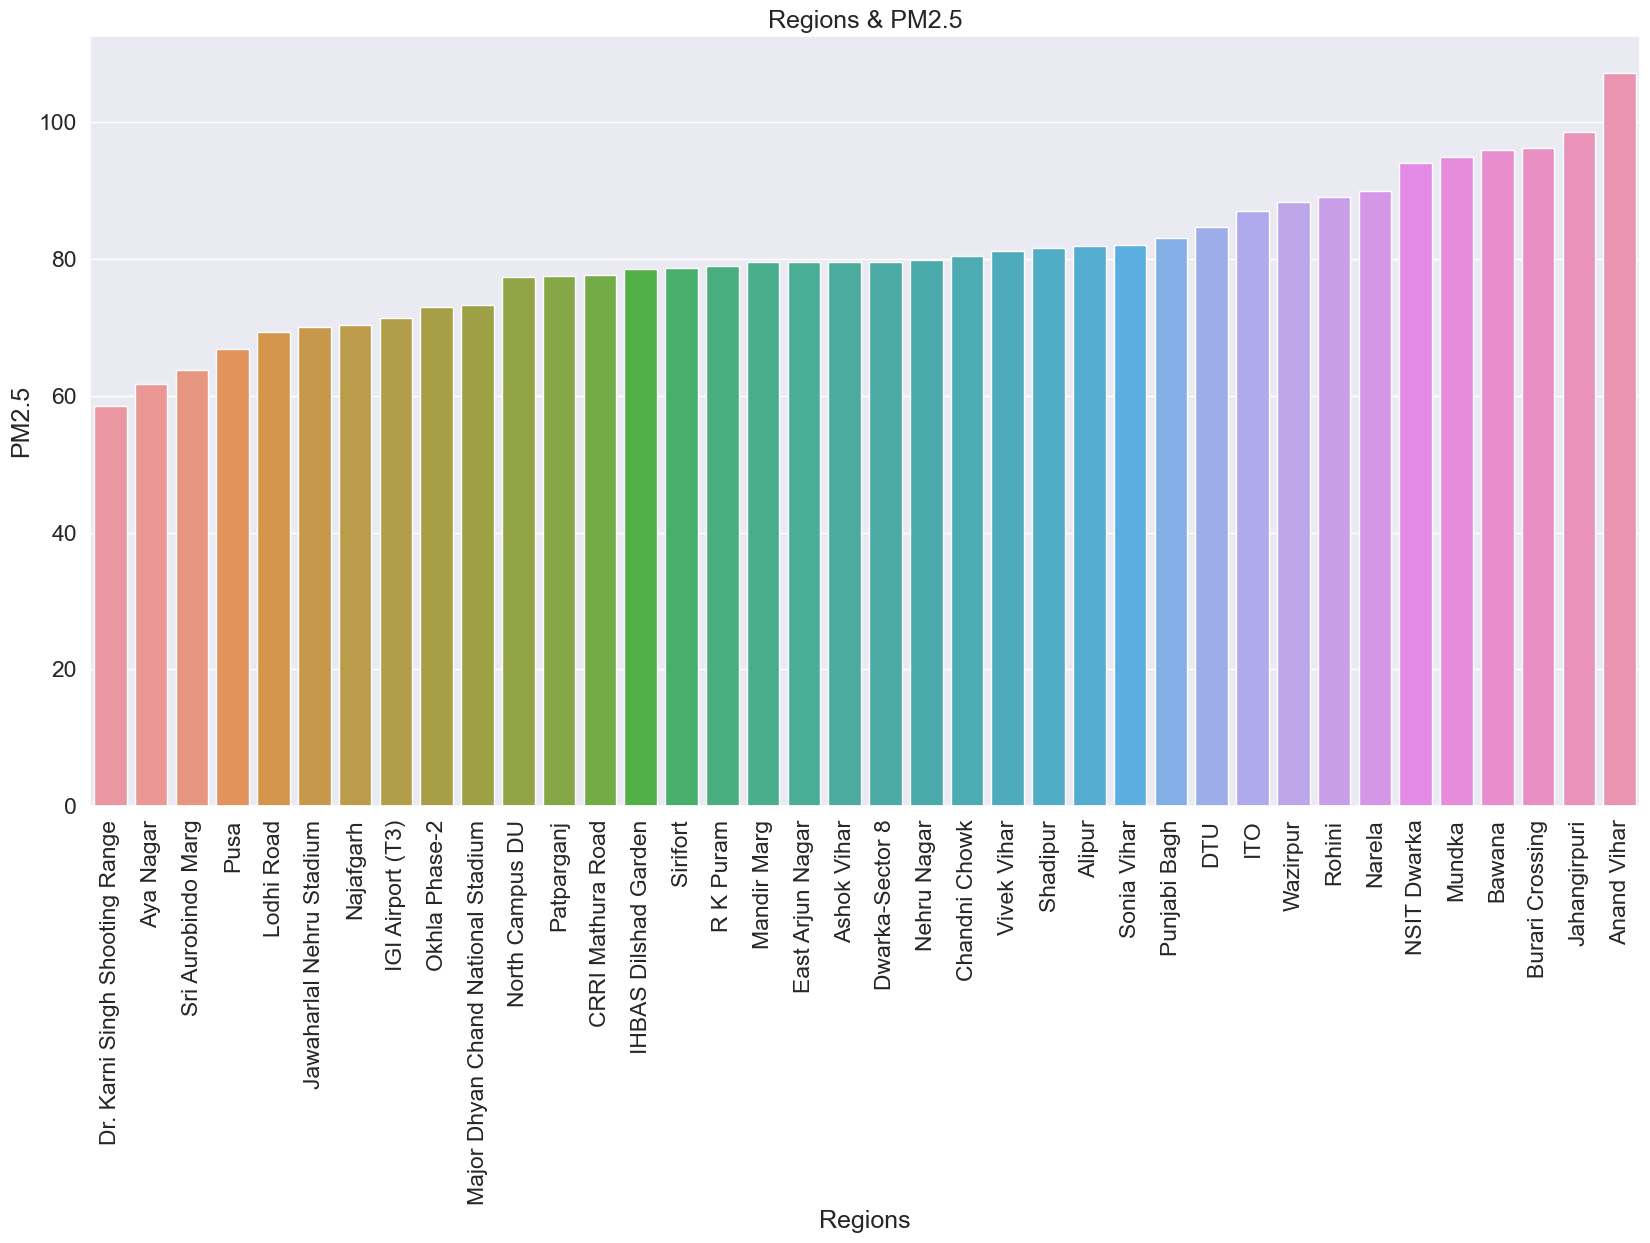

In [352]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.barplot(x='Regions', y='PM2.5', data=region_wise_pm25).set(title ='Regions & PM2.5')
plt.xticks(rotation=90)
plt.show()

**1. Conclusion**: On Average, Aizwal has been the city with the best AQI and Delhi, Ahmedabad, Lucknow have very poor AQ-indices.

In [353]:
df['Workbook'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [354]:
df.head()

,Workbook,Regions,State - Code,From Date,To Date,CO,NH3,NO2,Ozone,PM10,PM2.5,SO2,Air_Quality
0,2017,Anand Vihar,Delhi - DPCC,01-01-2017 12:00,02-01-2017 12:00,4.16,101.85,78.06,19.50,490.59,265.85,22.41,Very Poor
1,2017,Anand Vihar,Delhi - DPCC,02-01-2017 12:00,03-01-2017 12:00,3.42,98.76,100.54,15.13,462.05,223.29,22.55,Poor
2,2017,Anand Vihar,Delhi - DPCC,03-01-2017 12:00,04-01-2017 12:00,6.96,114.48,116.27,12.83,663.72,341.61,26.62,Very Poor
3,2017,Anand Vihar,Delhi - DPCC,04-01-2017 12:00,05-01-2017 12:00,2.96,112.07,90.04,12.60,335.03,182.66,22.39,Poor
4,2017,Anand Vihar,Delhi - DPCC,05-01-2017 12:00,06-01-2017 12:00,3.45,118.43,116.02,13.01,479.20,236.25,20.61,Poor


In [355]:
x1 = df[['Regions','PM2.5','Workbook']].groupby(['Regions','Workbook']).median().sort_values(['PM2.5']).reset_index()

In [356]:
x1.head()

,Regions,Workbook,PM2.5
0,Punjabi Bagh,2017,20.190
1,Dr. Karni Singh Shooting Range,2020,44.910
2,Shadipur,2020,45.775
3,Dr. Karni Singh Shooting Range,2018,49.500
4,Sri Aurobindo Marg,2020,54.430


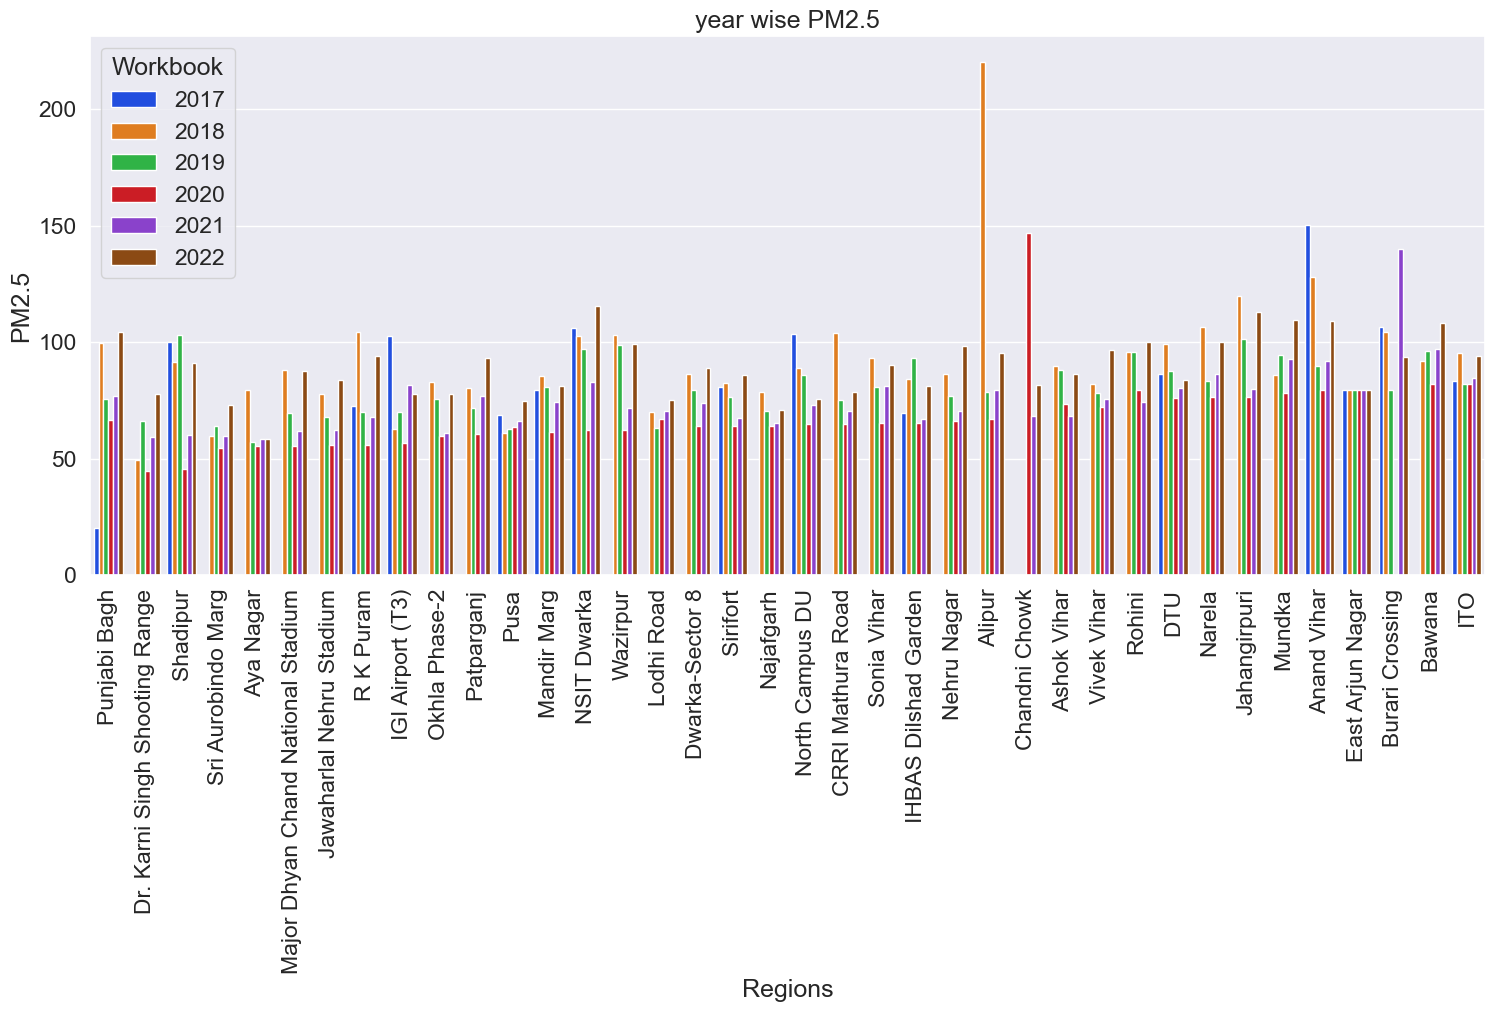

In [357]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='Regions', y='PM2.5', data=x1,hue='Workbook',palette='bright').set(title ='year wise PM2.5')
plt.xticks(rotation=90)
plt.show()

**2. Conclusion**:The plot shows a huge spike in the AQI for the city of Ahmedabad during the years 2018 & 2019.

Majority of this is coming from Power plant exhaust, Road dust and transport.

# **Preparing Data for Classification**

In [358]:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
categorical_attributes

['Regions', 'State - Code', 'From Date', 'To Date', 'Air_Quality']

In [361]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
df['Regions']=le.fit_transform(df['Regions'].astype(str))
df['Air_Quality']=le.fit_transform(df['Air_Quality'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73238 entries, 0 to 73237
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Workbook      73238 non-null  int64  
 1   Regions       73238 non-null  int32  
 2   State - Code  73238 non-null  object 
 3   From Date     73238 non-null  object 
 4   To Date       73238 non-null  object 
 5   CO            73238 non-null  float64
 6   NH3           73238 non-null  float64
 7   NO2           73238 non-null  float64
 8   Ozone         73238 non-null  float64
 9   PM10          73238 non-null  float64
 10  PM2.5         73238 non-null  float64
 11  SO2           73238 non-null  float64
 12  Air_Quality   73238 non-null  int32  
dtypes: float64(7), int32(2), int64(1), object(3)
memory usage: 6.7+ MB


In [362]:
y = df['Air_Quality']
x = df[['Regions', 'PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2',
       'Ozone']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [363]:
df['Air_Quality'].unique()

array([6, 3, 2, 4, 5, 0, 1])

In [364]:
df['Regions'].unique()

array([ 1, 27, 30, 23, 32, 33, 34,  3,  6, 10, 14, 15, 17, 19, 20,  0,  4,
       16, 26, 28, 31, 12, 35, 36, 37,  2,  5,  7,  8,  9, 11, 13, 18, 21,
       22, 24, 25, 29])

In [365]:
#checking data in all categories
from collections import Counter
Counter(y_train)

Counter({4: 16888, 2: 16969, 3: 18261, 0: 2764, 6: 2750, 1: 257, 5: 701})

Data Imbalance:
Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [366]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({4: 18261, 2: 18261, 3: 18261, 0: 18261, 6: 18261, 1: 18261, 5: 18261})


# **Model Training**

1. SVM

In [367]:
from sklearn.metrics import accuracy_score
import sklearn
cls = sklearn.svm.SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
accuracy = accuracy_score(y_test,svmpred)*100
print("Accuracy = ",accuracy)

Accuracy =  87.31567449481157


In [368]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,svmpred)
print("Confusion matrix\n")
print(cm)

Confusion matrix

[[ 641    0   50    0    0   11    0]
 [   0   55    0    0    1    0    0]
 [1563    0 2630    9   52    0    0]
 [  38    0    6 4472    0    0   68]
 [   3   22   22    1 4153    0    0]
 [   0    0    0    0    0  156    0]
 [   0    0    0    0    0   12  683]]


In [369]:
from sklearn.metrics import classification_report
print(classification_report(svmpred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.29      0.44      2245
           1       0.98      0.71      0.83        77
           2       0.62      0.97      0.76      2708
           3       0.98      1.00      0.99      4482
           4       0.99      0.99      0.99      4206
           5       1.00      0.87      0.93       179
           6       0.98      0.91      0.94       751

    accuracy                           0.87     14648
   macro avg       0.92      0.82      0.84     14648
weighted avg       0.90      0.87      0.86     14648



In [370]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(cls,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.87732114 0.96108684 0.96006281 0.96210828 0.96115245]
Average Cross Validation score :0.9443463033961766


c:\Python311\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


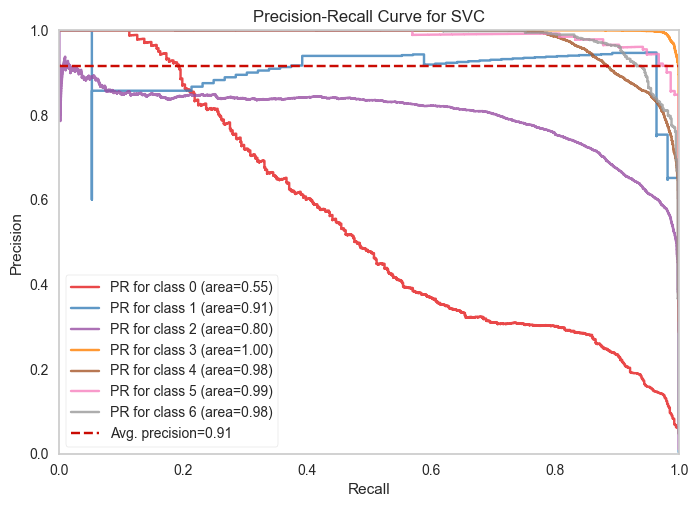

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [371]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(cls,per_class=True,
    cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

2. Random Forest

In [372]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf = rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("accuracy",rf_acc_score*100)

accuracy 99.7815401419989


In [373]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)

confussion matrix
[[ 682    0   17    1    0    2    0]
 [   0   56    0    0    0    0    0]
 [   2    0 4250    2    0    0    0]
 [   0    0    0 4584    0    0    0]
 [   0    0    0    0 4201    0    0]
 [   0    0    0    0    0  154    2]
 [   0    1    0    4    0    1  689]]


In [374]:
from sklearn.metrics import classification_report
print(classification_report(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       684
           1       1.00      0.98      0.99        57
           2       1.00      1.00      1.00      4267
           3       1.00      1.00      1.00      4591
           4       1.00      1.00      1.00      4201
           5       0.99      0.98      0.98       157
           6       0.99      1.00      0.99       691

    accuracy                           1.00     14648
   macro avg       0.99      0.99      0.99     14648
weighted avg       1.00      1.00      1.00     14648



In [375]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(rf,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96374932 0.99617695 0.9956308  0.99467468 0.99556223]
Average Cross Validation score :0.9891587962439731


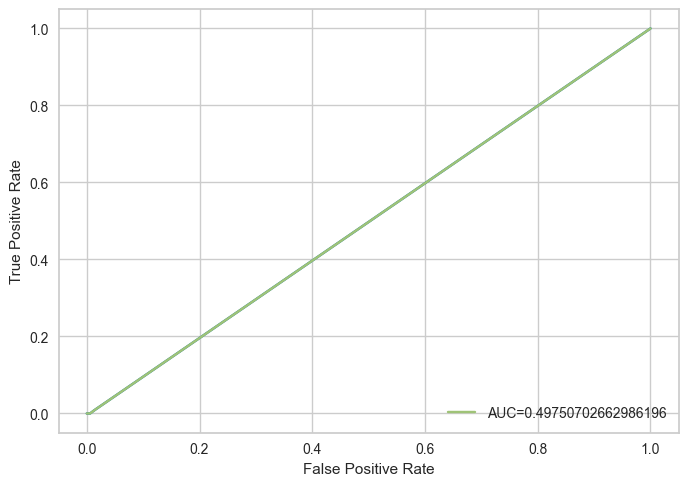

In [376]:
from sklearn import metrics
import numpy as np
#define metrics
y_pred_prob = rf.predict_proba(X_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,y_pred_prob,pos_label=2)
auc = np.trapz(tpr,fpr)


#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [377]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(rf,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96374932 0.99617695 0.9956308  0.99467468 0.99556223]
Average Cross Validation score :0.9891587962439731


3. Logistic Regression

In [378]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lg = logreg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, lg_pred)*100
print("accuracy",accuracy)

accuracy 53.9800655379574


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [379]:
lg_conf_matrix = confusion_matrix(y_test, lg_pred)
print("confussion matrix")
print(lg_conf_matrix)

confussion matrix
[[ 162    0  286  119   17  113    5]
 [   0   56    0    0    0    0    0]
 [ 834    0 2276  515  605    1   23]
 [1528    0  399 1753   24  244  636]
 [ 151   82  673   43 3251    0    1]
 [   7    0    0    0    0  113   36]
 [  78    0    1   63    0  257  296]]


In [380]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Cross Validation Scores are [0.65141999 0.69053796 0.70692245 0.71065747 0.73277804]
Average Cross Validation score :0.6984631818066058


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. **Naive Bayes**

In [381]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb= nb.fit(X_train, y_train)
nb_pred  =  nb.predict(X_test)

In [382]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, nb_pred)
ac = accuracy_score(y_test,nb_pred)
print("accuracy",ac*100)

accuracy 67.61332605133806


In [383]:
nv_conf_matrix = confusion_matrix(y_test, nb_pred)
print("confussion matrix")
print(rf_conf_matrix)

confussion matrix
[[ 682    0   17    1    0    2    0]
 [   0   56    0    0    0    0    0]
 [   2    0 4250    2    0    0    0]
 [   0    0    0 4584    0    0    0]
 [   0    0    0    0 4201    0    0]
 [   0    0    0    0    0  154    2]
 [   0    1    0    4    0    1  689]]


In [384]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(nb,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.76201529 0.85308575 0.85854724 0.8390114  0.8390114 ]
Average Cross Validation score :0.8303342165866099
